## Question 3

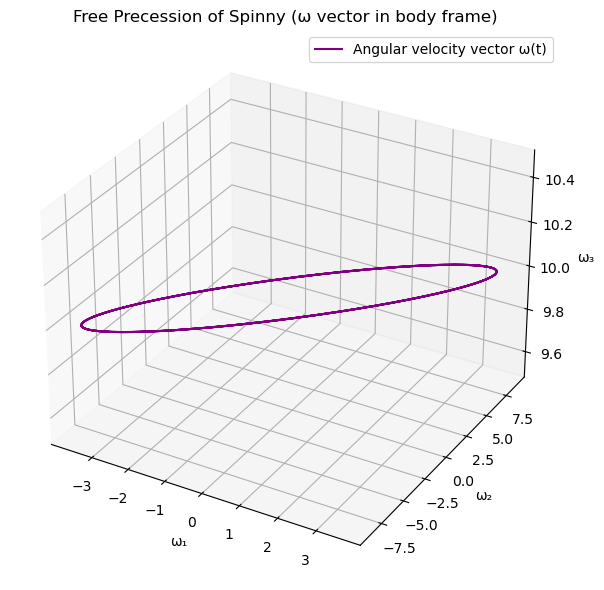

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
I1 = I2 = 3.9385     # kg·m² (transverse moment of inertia)
I3 = 0.201         # kg·m² (axial moment of inertia)
omega3 = 10.0     # rad/s (initial spin around symmetry axis)

# Precession frequency
Omega = (I1 - I3) / I1 * omega3

# Time array
t = np.linspace(0, 2 * np.pi / Omega * 3, 1000)  # 3 precession cycles

# Initial conditions for omega1, omega2
A,C = 2.0 , 5.0  # amplitude of ω1
B,D = 3.0, 7.0  # phase-shifted component (set to 0 for circular motion)

# Angular velocity components
omega1 = A * np.cos(Omega * t) + B * np.sin(Omega * t)
omega2 = C * np.sin(Omega * t) + D * np.cos(Omega * t)
omega3 = np.full_like(t, omega3)

# Plotting the trajectory of ω(t) in 3D body-fixed frame
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(omega1, omega2, omega3, label='Angular velocity vector ω(t)', color='purple')
ax.set_xlabel('ω₁')
ax.set_ylabel('ω₂')
ax.set_zlabel('ω₃')
ax.set_title('Free Precession of Spinny (ω vector in body frame)')
ax.legend()
plt.tight_layout()
plt.savefig('Question 3.png', format='png', dpi=300)
plt.show()


## Question 4

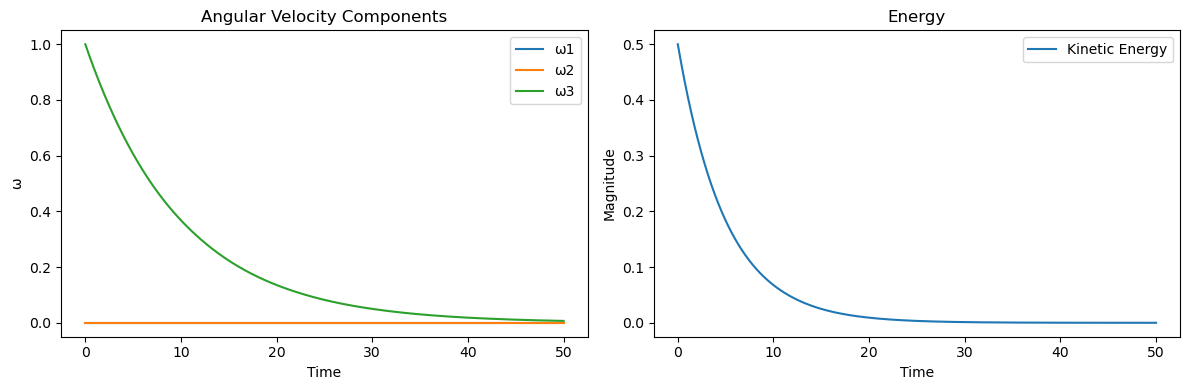

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Inertia values
I1, I2, I3 = 5.0, 3.0, 1.0
k = 0.1  # Damping coefficient

def euler_eq_with_damping(t, omega):
    w1, w2, w3 = omega
    dw1 = ((I2 - I3) * w2 * w3 - k * w1) / I1
    dw2 = ((I3 - I1) * w3 * w1 - k * w2) / I2
    dw3 = ((I1 - I2) * w1 * w2 - k * w3) / I3
    return [dw1, dw2, dw3]

# Initial angular momentum aligned with b3 (min inertia)
L0 = 1.0
omega0 = [0.0, 0.0, L0 / I3]  # [ω1, ω2, ω3]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
sol = solve_ivp(euler_eq_with_damping, t_span, omega0, t_eval=t_eval)
ω1, ω2, ω3 = sol.y
t = sol.t

# Kinetic Energy and Angular Momentum Magnitude
T = 0.5 * (I1 * ω1**2 + I2 * ω2**2 + I3 * ω3**2)
L_mag = np.sqrt((I1*ω1)**2 + (I2*ω2)**2 + (I3*ω3)**2)



# Plot angular velocities
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, ω1, label='ω1')
plt.plot(t, ω2, label='ω2')
plt.plot(t, ω3, label='ω3')
plt.title('Angular Velocity Components')
plt.xlabel('Time')
plt.ylabel('ω')
plt.legend()

# Plot energy and angular momentum
plt.subplot(1, 2, 2)
plt.plot(t, T, label='Kinetic Energy')
# plt.plot(t, L_mag, label='|L|')
plt.title('Energy')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
plt.savefig('Question 4 Energy Decay.png', format='png', dpi=300)
plt.show()


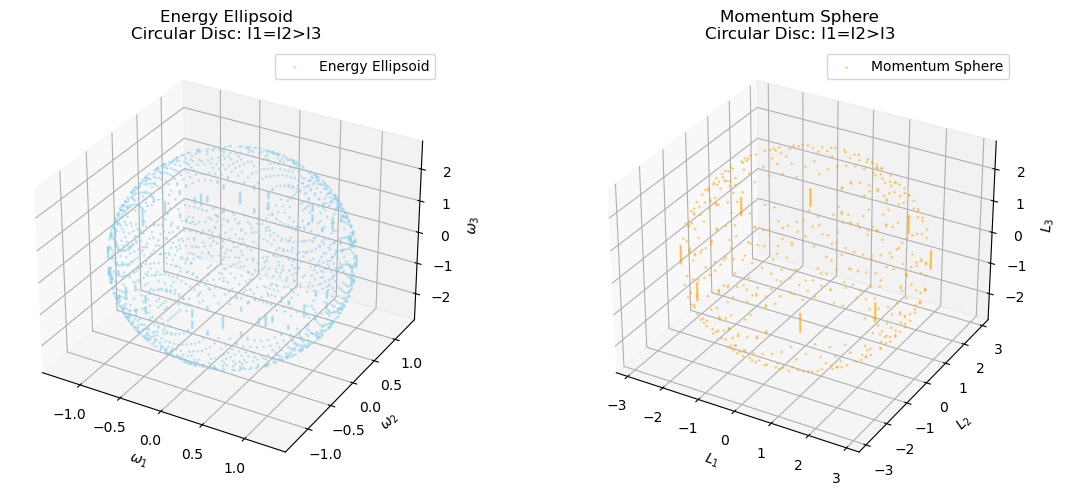

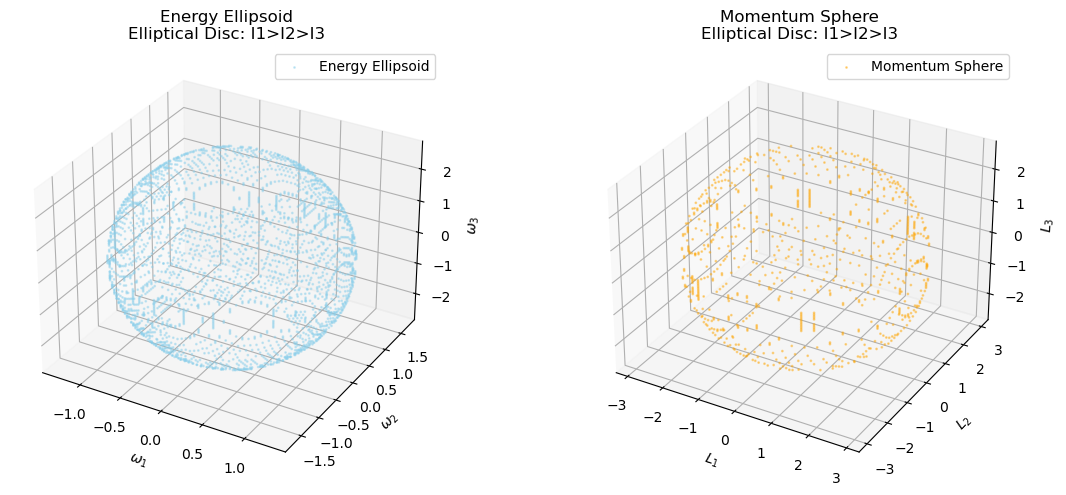

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_energy_and_momentum(I1, I2, I3, L_mag, L_dir_label=""):

    # Angular momentum vector (fixed in inertial frame)
    L_dir = np.array([0.0, 0.2, 1.0])
    L_dir /= np.linalg.norm(L_dir)
    L_vec = L_mag * L_dir

    # Initial angular velocity from L = Iω
    I_mat = np.diag([I1, I2, I3])
    omega0 = np.linalg.inv(I_mat) @ L_vec

    # Kinetic energy
    T = 0.5 * (I1 * omega0[0]**2 + I2 * omega0[1]**2 + I3 * omega0[2]**2)

    # Grid in angular velocity space
    omega_range = np.linspace(-2.5, 2.5, 100)
    W1, W2, W3 = np.meshgrid(omega_range, omega_range, omega_range)

    # Energy ellipsoid in ω-space
    E = 0.5 * (I1*W1**2 + I2*W2**2 + I3*W3**2)
    energy_surface = np.isclose(E, T, atol=0.02)

    # Compute angular momentum in body frame
    Lx = I1 * W1
    Ly = I2 * W2
    Lz = I3 * W3
    L_squared = Lx**2 + Ly**2 + Lz**2
    momentum_surface = np.isclose(L_squared, L_mag**2, atol=0.05)

    # Plot Energy Ellipsoid in ω-space
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(W1[energy_surface], W2[energy_surface], W3[energy_surface],
                color='skyblue', alpha=0.4, s=1, label='Energy Ellipsoid')
    ax1.set_xlabel(r'$\omega_1$')
    ax1.set_ylabel(r'$\omega_2$')
    ax1.set_zlabel(r'$\omega_3$')
    ax1.set_title(f'Energy Ellipsoid\n{L_dir_label}')
    ax1.legend()

    # Plot Momentum Sphere in L-space
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(Lx[momentum_surface], Ly[momentum_surface], Lz[momentum_surface],
                color='orange', alpha=0.4, s=1, label='Momentum Sphere')
    ax2.set_xlabel(r'$L_1$')
    ax2.set_ylabel(r'$L_2$')
    ax2.set_zlabel(r'$L_3$')
    ax2.set_title(f'Momentum Sphere\n{L_dir_label}')
    ax2.legend()

    plt.tight_layout()
    

# Case 1: Circular disc (I1 = I2 > I3)
plot_energy_and_momentum(I1=5.0, I2=5.0, I3=1.0, L_mag=3.0, L_dir_label="Circular Disc: I1=I2>I3")
plt.savefig('Question 4 EM Circular .png', format='png', dpi=300)


# Case 2: Elliptical disc (I1 > I2 > I3)
plot_energy_and_momentum(I1=5.0, I2=3.0, I3=1.0, L_mag=3.0, L_dir_label="Elliptical Disc: I1>I2>I3")
plt.savefig('Question 4 EM Ellipse .png', format='png', dpi=300)
plt.show()
